# Data Mining / Prospeção de Dados

## Diogo F. Soares and Sara C. Madeira, 2020/21

# Project 3 - Classification/Regression

## Logistics

**_Read Carefully_**

**Students should work in teams of 2 or 3 people**. 

Individual projects might be allowed (with valid justification), but will not have better grades for this reason. 

* Tasks **1 to 4** should be done by **all** groups **BUT**
    * In Tasks **2 and 3** the number of classifiers/regressors to use is **`X` = 3 and 4**  for groups of 2 and 3 students, respectively.
    * In Task **4**, groups of 2 and 3 students should try 2 and 3 ensemble approaches, respectively.

The quality of the project will dictate its grade, not the number of people working.

**The project's solution should be uploaded in Moodle before the end of  `May, 23th (23:59)`.** 

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 
Groups should be registered in [Moodle](https://moodle.ciencias.ulisboa.pt/mod/groupselect/view.php?id=139096) and the zip file should be identified as `PDnn.zip` where `nn` is the number of your group.

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. You can use `PD_202021_P3.ipynb`as template. In your `.zip` folder you should also include an HTML version of your notebook with all the outputs** (File > Download as > HTML).

**Decisions should be justified and results should be critically discussed.** 

_Project solutions containing only code and outputs without discussions will achieve a maximum grade 10 out of 20._

## Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[Scikit-learn](http://scikit-learn.org/stable/). You are also allowed to use [Orange3](https://orange.biolab.si).**

The dataset to be analysed is **`RestaurantsRevenue.csv`**, a modified version of the test dataset used in Kaggle's competition ["Restaurant Revenue Prediction"](https://www.kaggle.com/c/restaurant-revenue-prediction/overview). 

**This project challenges you twice** by asking you to tackle a
1. **Regression Task**: predict the revenue, and a
2. **Classification Task**: predict a revenue category.

The available variables are:

* **Id :** Restaurant id. 
* **Open Date :** opening date for a restaurant
* **City :** City that the restaurant is in. Note that there are unicode in the names. 
* **City Group:** Type of the city. Big cities, or Other. 
* **Type:** Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
* **P1, P2 - P37:** There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.


The targets are:
1. **`Revenue`:** The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 
2. **`RevenueCategory`** - the revenue category, where price can be below 12000 ("<12K"), between 12000 and 20000 ("12K-20K"), or above 20000 (">20K"). This is the target variable that you're trying to predict in the classification task. 

## Team Identification

**GROUP NNN**

Students:

* Student 1 - n_student1
* Student 2 - n_student2
* Student 3 - n_student3

## 1. Load and Preprocess Dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
import time
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Here you might consider useful to think about:
1. Missing Value Imputation
2. Feature Selection
3. Class Imbalance

In [3]:
#before going through the 3 tasks above, we will explore the dataset

In [4]:
df = pd.read_csv('RestaurantsReveneu.csv')

In [5]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,10033.0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9355.0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,11353.0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,3.0,0,4,0,0,0,0,0,0,10828.0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,9354.0


In [6]:
df.shape

(100000, 43)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [8]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,...,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500,14698.061620
std,28867.657797,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,...,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267,6705.081965
min,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6271.000000
25%,24999.750000,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10143.000000
50%,49999.500000,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12951.000000
75%,74999.250000,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,...,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,16923.000000
max,99999.000000,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,...,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000,52294.000000


In [9]:
df['Open Date'] = pd.to_datetime(df['Open Date'])

In [10]:
df['Open Date'].nunique()

310

In [11]:
df['Open Date']=df['Open Date'].dt.strftime('%m-%Y')

In [12]:
#converting to just %m-%Y format since we don't consider the day to be relevant
df['Open Date']

0        01-2011
1        03-2011
2        10-2013
3        05-2013
4        07-2013
          ...   
99995    01-2000
99996    07-2011
99997    12-2012
99998    10-2013
99999    10-2010
Name: Open Date, Length: 100000, dtype: object

In [13]:
first_date = df["Open Date"].min()
last_date = df["Open Date"].max()

In [14]:
first_date

'01-1999'

In [15]:
last_date

'12-2013'

In [16]:
df.City.value_counts()

İstanbul          34087
Ankara             8720
İzmir              6465
Antalya            5911
Kocaeli            4364
Mersin             2735
Adana              2514
Balıkesir          2463
Bursa              2441
Muğla              1823
Aydın              1617
Tekirdağ           1577
Konya              1576
Gaziantep          1487
Edirne             1230
Manisa             1227
Çanakkale           965
Denizli             964
Diyarbakır          954
Hatay               951
Zonguldak           926
Eskişehir           900
Trabzon             660
Aksaray             650
Bolu                631
Yalova              630
Kırıkkale           622
Malatya             616
Mardin              610
Şanlıurfa           609
Batman              604
Sakarya             604
Rize                345
Artvin              344
Bilecik             339
Afyonkarahisar      331
Nevşehir            328
Sivas               326
Samsun              324
Kayseri             323
Kırşehir            319
Erzincan        

In [17]:
df['City Group'].value_counts()

Other         50728
Big Cities    49272
Name: City Group, dtype: int64

In [18]:
df['Type'].value_counts()

FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64

   - 1.1 Missing Values

In [19]:
df.isna().sum() 

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [20]:
#we will take a closer look at columns starting with "P" which represent obfuscated data
for col in df.columns:
    if col[0] == 'P':
        print (col, '- unique values:', len(df[col].unique()))

P1 - unique values: 9
P2 - unique values: 9
P3 - unique values: 7
P4 - unique values: 7
P5 - unique values: 6
P6 - unique values: 8
P7 - unique values: 7
P8 - unique values: 8
P9 - unique values: 5
P10 - unique values: 4
P11 - unique values: 8
P12 - unique values: 7
P13 - unique values: 5
P14 - unique values: 10
P15 - unique values: 9
P16 - unique values: 9
P17 - unique values: 10
P18 - unique values: 9
P19 - unique values: 9
P20 - unique values: 9
P21 - unique values: 9
P22 - unique values: 5
P23 - unique values: 9
P24 - unique values: 9
P25 - unique values: 9
P26 - unique values: 10
P27 - unique values: 10
P28 - unique values: 9
P29 - unique values: 8
P30 - unique values: 10
P31 - unique values: 10
P32 - unique values: 10
P33 - unique values: 7
P34 - unique values: 11
P35 - unique values: 7
P36 - unique values: 10
P37 - unique values: 8


In [21]:
obfuscated_cols = []
for col in df.columns:
    if col[0] == 'P':
        obfuscated_cols.append(col)

In [22]:
(~df[obfuscated_cols].all(1)).sum() 
#out of 100000 rows, 92414 have at least one zero in the obfuscated features P1-037

92414

In [23]:
df_ob = df[obfuscated_cols] #getting a dataframe with just the features starting with "P"

In [24]:
missing_obfuscated_cols = df_ob[df_ob == 0].count(axis=0)/df_ob.shape[0]*100

In [25]:
missing_obfuscated_cols.sort_values() #getting the missing values (when an instance is zero) for each of the "P" features

P1      0.000
P28     0.000
P23     0.000
P22     0.000
P21     0.000
P20     0.000
P13     0.000
P12     0.000
P11     0.000
P19     0.000
P9      0.000
P8      0.000
P7      0.000
P2      0.000
P6      0.000
P5      0.000
P4      0.000
P10     0.000
P3      0.318
P29     3.083
P31    65.566
P30    65.596
P36    65.662
P14    65.734
P25    65.738
P24    65.766
P15    65.772
P35    65.776
P26    65.784
P32    65.787
P33    65.791
P17    65.792
P34    65.832
P18    65.980
P37    66.029
P16    66.094
P27    66.193
dtype: float64

In [26]:
#dropping features with more than 65% of missing values
missing_obfuscated_cols_to_drop = missing_obfuscated_cols[missing_obfuscated_cols>65].index
missing_obfuscated_cols_to_drop = list(missing_obfuscated_cols_to_drop)
missing_obfuscated_cols_to_drop

['P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P24',
 'P25',
 'P26',
 'P27',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37']

In [27]:
df = df.drop(missing_obfuscated_cols_to_drop, axis=1)

In [28]:
#replacing missing values of P3 and P29 with the mean
df['P3']=df['P3'].replace(0,df['P3'].mean())
df['P29']=df['P3'].replace(0,df['P29'].mean())

**P1, P2 - P37**: There are three categories of these obfuscated data:
- Demographic data (population in any given area, age and gender distribution, development scales)
- Real estate data (m2 of the location, front facade of the location, car park availability)
- Commercial data (points of interest including schools, banks, other QSR operators)

Although we know that there are 3 categories in the obfuscated data represented from columns P1-P37, we are not able to choose an imputation method at the risk of changing the original data. A zero could represent that there are no points of interest in a given city or simply they were not measured, thus it would be wrong for us to input the missing values with the mean or median for that certain feature. We have chosen to drop from our analysis features whose missing values represent more than 65%, those are: P31, P30, P36, P14, P25, P24, P15, P35, P26, P32, P33, P17, P34, P18, P37, P16 and P27. As such, we will end up with only 2 of the obfuscated features with missing values, P3 and P29, with zeros representing 0.3% and 3.1%. Given these low percetages, we will replace the zeros with the mean. 

One call out about these obfuscated features, whose instances seem to between 1 and 25 could be that, for example, they are the order of the answers in a formulaire e.g. for question 1 (P1), Restaurant with ID 1 has answered the first option 1. We should again, keep in mind, we are just making this assumption. 
This would highlight the fact that this representation may cause some issues since some Machine Learning algorithms will assume that two nearby values (answering option 1 and option 2) are more similar than two distant (answering option 1 and option 25). It may not be the case for the obfuscated features. To fix this, we will create one binary attribute per obfuscated feature: one attribute equal to 1 when P1 is "1" (and 0 otherwise). We will also use One Hot Encoding for the categorical features we have analysed: City, City Group and Type as well as the time series data (Open Date). 

- 1.2 Feature selection

   - 1.2.a) Categorical Features

In [29]:
df_cat = df.drop(['Id','revenue'],axis=1)

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)

In [32]:
df_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
df_cat_1hot.shape

(100000, 350)

In [34]:
cat_encoder.get_feature_names()

array(['x0_01-1999', 'x0_01-2000', 'x0_01-2005', 'x0_01-2009',
       'x0_01-2011', 'x0_01-2012', 'x0_01-2013', 'x0_01-2014',
       'x0_02-1998', 'x0_02-2000', 'x0_02-2004', 'x0_02-2007',
       'x0_02-2009', 'x0_02-2010', 'x0_02-2011', 'x0_02-2012',
       'x0_02-2013', 'x0_03-1996', 'x0_03-1998', 'x0_03-2002',
       'x0_03-2005', 'x0_03-2006', 'x0_03-2007', 'x0_03-2008',
       'x0_03-2009', 'x0_03-2010', 'x0_03-2011', 'x0_03-2012',
       'x0_03-2013', 'x0_04-1997', 'x0_04-1998', 'x0_04-2000',
       'x0_04-2006', 'x0_04-2007', 'x0_04-2008', 'x0_04-2009',
       'x0_04-2010', 'x0_04-2011', 'x0_04-2012', 'x0_04-2013',
       'x0_05-1995', 'x0_05-1997', 'x0_05-1998', 'x0_05-2006',
       'x0_05-2007', 'x0_05-2008', 'x0_05-2009', 'x0_05-2010',
       'x0_05-2011', 'x0_05-2012', 'x0_05-2013', 'x0_06-1996',
       'x0_06-1997', 'x0_06-1999', 'x0_06-2000', 'x0_06-2001',
       'x0_06-2003', 'x0_06-2006', 'x0_06-2007', 'x0_06-2009',
       'x0_06-2010', 'x0_06-2011', 'x0_06-2012', 'x0_06

In [35]:
X = pd.DataFrame(df_cat_1hot.toarray(), columns=cat_encoder.get_feature_names())

In [36]:
X.head(2)

,x0_01-1999,x0_01-2000,x0_01-2005,x0_01-2009,x0_01-2011,x0_01-2012,x0_01-2013,x0_01-2014,x0_02-1998,x0_02-2000,...,x22_7.5,x22_10.0,x22_12.5,x23_2.0,x23_3.0,x23_4.0,x23_4.215325,x23_4.5,x23_5.0,x23_6.0
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


   - 1.3 Class Imbalance

Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values.

RevenueCategory - the revenue category, where price can be below 12000 ("<12K"), between 12000 and 20000 ("12K-20K"), or above 20000 (">20K"). This is the target variable that you're trying to predict in the classification task.

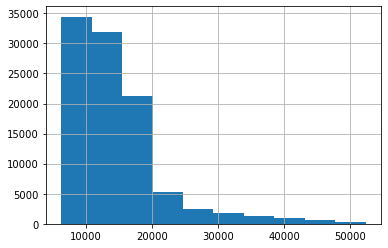

In [37]:
df.revenue.hist();

In [38]:
df.revenue.max() #to get the last value for the bin numbers

52294.0

In [39]:
df['revenue_category'] = pd.cut(df.revenue,
                               bins=[0, 12000, 20000, 52295], 
                                right=False,
                                labels = ['<12K','12K-20K','>20K'])

In [40]:
df.loc[df.revenue==12000][['revenue','revenue_category']].head(2) #sanity check

,revenue,revenue_category
1389,12000.0,12K-20K
1471,12000.0,12K-20K


In [41]:
df.loc[df.revenue==df.revenue.max()][['revenue','revenue_category']]

,revenue,revenue_category
74427,52294.0,>20K


In [42]:
pd.DataFrame(np.round(df['revenue_category'].value_counts(normalize=True) * 100,2))

,revenue_category
12K-20K,43.94
<12K,43.40
>20K,12.66


In [43]:
df.loc[df['revenue_category'].isnull().values] #checking

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P13,P19,P20,P21,P22,P23,P28,P29,revenue,revenue_category


In [44]:
y =df['revenue_category']

- We will apply the stratified sampling method to ensure that the right number of instances are sampled from each of the 3 categories (<12K, 12K-20K, >20K) such that the test set is representative of the overall population.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train_cat, y_test_cat = train_test_split(X, df['revenue_category'], test_size = 0.2, stratify=df['revenue_category'])

In [47]:
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train_cat.shape)
print("y_test shape is : ", y_test_cat.shape)

X_train shape is :  (80000, 350)
X_test shape  is :  (20000, 350)
y_train shape is :  (80000,)
y_test shape is :  (20000,)


In [48]:
pd.DataFrame(np.round(y_test_cat.value_counts(normalize=True) * 100,2))

,revenue_category
12K-20K,43.94
<12K,43.40
>20K,12.66


In [49]:
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X, df['revenue'], test_size = 0.2)

In [50]:
print("X_train_rev shape is : ", X_train_rev.shape)
print("X_test_rev shape  is : ", X_test_rev.shape)
print("y_train_rev shape is : ", y_train_rev.shape)
print("y_test_rev shape is : ", y_test_rev.shape)

X_train_rev shape is :  (80000, 350)
X_test_rev shape  is :  (20000, 350)
y_train_rev shape is :  (80000,)
y_test_rev shape is :  (20000,)


- The test set generated using stratified sampling has revenue category proportions similar to those in the full dataset we've previously seen above

## 2. Learning Simple Classifiers

* Choose **`X` classifiers** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and stratified 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Present mean and standard deviation of accuracy, precision and recall.
* Show confusion matrices.

In [51]:
scores = ['accuracy','precision','recall'] 

In [52]:
kfolds = StratifiedKFold(10) #using stratified 10 fold cross-validation

   - 2.1. Multiclass Logistic Regression

In [53]:
tuned_parameters= dict(max_iter=[80,100,120], 
                       C=[0.5,1,2,3], 
                       penalty=['l1', 'l2', 'elasticnet', 'none'])

In [54]:
for score in scores: #optimizing for each of the performance metrics
    print("Tuning hyper-parameters for", score)
    print()

    clf = GridSearchCV(LogisticRegression(solver='saga'), #using gridsearch
                       tuned_parameters, 
                       scoring=score, 
                       cv=kfolds.split(X_train[:50], y_train_cat[:50]))
    clf.fit(X_train[:50], y_train_cat[:50])

    print("Best parameters found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid", score,"scores on development set:") 
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']): #we will print out the mean and standard deviation
        print("  Mean = %0.3f | Std Deviation = %0.3f for %r"
              % (mean, std * 2, params)) #for each parameter combination
    print()
    print("Confusion matrix based on the full evaluation set:")
    print()
    y_true, y_pred = y_test_cat[:50], clf.predict(X_test[:50])
    print(confusion_matrix(y_true, y_pred))
    print()
    print('Accuracy', np.round(accuracy_score(y_true,y_pred),3))
    print('Recall', np.round(recall_score(y_true,y_pred, average='weighted'),3))
    print('Precision', np.round(precision_score(y_true,y_pred, average='weighted'),3))
    print("______________________________________")
    print()

Tuning hyper-parameters for accuracy

Best parameters found on development set:

{'C': 2, 'max_iter': 80, 'penalty': 'l1'}

Grid accuracy scores on development set:

  Mean = 0.360 | Std Deviation = 0.392 for {'C': 0.5, 'max_iter': 80, 'penalty': 'l1'}
  Mean = 0.540 | Std Deviation = 0.475 for {'C': 0.5, 'max_iter': 80, 'penalty': 'l2'}
  Mean = nan | Std Deviation = nan for {'C': 0.5, 'max_iter': 80, 'penalty': 'elasticnet'}
  Mean = 0.500 | Std Deviation = 0.410 for {'C': 0.5, 'max_iter': 80, 'penalty': 'none'}
  Mean = 0.360 | Std Deviation = 0.392 for {'C': 0.5, 'max_iter': 100, 'penalty': 'l1'}
  Mean = 0.540 | Std Deviation = 0.475 for {'C': 0.5, 'max_iter': 100, 'penalty': 'l2'}
  Mean = nan | Std Deviation = nan for {'C': 0.5, 'max_iter': 100, 'penalty': 'elasticnet'}
  Mean = 0.520 | Std Deviation = 0.445 for {'C': 0.5, 'max_iter': 100, 'penalty': 'none'}
  Mean = 0.360 | Std Deviation = 0.392 for {'C': 0.5, 'max_iter': 120, 'penalty': 'l1'}
  Mean = 0.540 | Std Deviation = 0

Best parameters found on development set:

{'C': 0.5, 'max_iter': 80, 'penalty': 'l1'}

Grid recall scores on development set:

  Mean = nan | Std Deviation = nan for {'C': 0.5, 'max_iter': 80, 'penalty': 'l1'}
  Mean = nan | Std Deviation = nan for {'C': 0.5, 'max_iter': 80, 'penalty': 'l2'}
  Mean = nan | Std Deviation = nan for {'C': 0.5, 'max_iter': 80, 'penalty': 'elasticnet'}
  Mean = nan | Std Deviation = nan for {'C': 0.5, 'max_iter': 80, 'penalty': 'none'}
  Mean = nan | Std Deviation = nan for {'C': 0.5, 'max_iter': 100, 'penalty': 'l1'}
  Mean = nan | Std Deviation = nan for {'C': 0.5, 'max_iter': 100, 'penalty': 'l2'}
  Mean = nan | Std Deviation = nan for {'C': 0.5, 'max_iter': 100, 'penalty': 'elasticnet'}
  Mean = nan | Std Deviation = nan for {'C': 0.5, 'max_iter': 100, 'penalty': 'none'}
  Mean = nan | Std Deviation = nan for {'C': 0.5, 'max_iter': 120, 'penalty': 'l1'}
  Mean = nan | Std Deviation = nan for {'C': 0.5, 'max_iter': 120, 'penalty': 'l2'}
  Mean = nan | S

   - 2.2. Decision Tree Classifier

In [55]:
tuned_parameters= dict(criterion=['gini','entropy'],
                       max_depth= np.arange(3, 15))

In [56]:
for score in scores:
    print("Tuning hyper-parameters for", score)
    print()

    clf = GridSearchCV(
        DecisionTreeClassifier(), 
        tuned_parameters, 
        scoring=score,
        cv=kfolds.split(X_train[:50], y_train_cat[:50]))
    
    clf.fit(X_train[:50], y_train_cat[:50])

    print("Best parameters found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid", score,"scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("  Mean = %0.3f | Std Deviation = %0.3f for %r"
              % (mean, std * 2, params))
    print()

    print("Confusion matrix based on the full evaluation set:")
    print()
    y_true, y_pred = y_test_cat[:50], clf.predict(X_test[:50])
    print(confusion_matrix(y_true, y_pred))
    print()
    print('Accuracy', np.round(accuracy_score(y_true,y_pred),3))
    print('Recall', np.round(recall_score(y_true,y_pred, average='weighted'),3))
    print('Precision', np.round(precision_score(y_true,y_pred, average='weighted'),3))
    print("______________________________________")
    print()

Tuning hyper-parameters for accuracy

Best parameters found on development set:

{'criterion': 'gini', 'max_depth': 4}

Grid accuracy scores on development set:

  Mean = 0.440 | Std Deviation = 0.299 for {'criterion': 'gini', 'max_depth': 3}
  Mean = 0.520 | Std Deviation = 0.480 for {'criterion': 'gini', 'max_depth': 4}
  Mean = 0.440 | Std Deviation = 0.349 for {'criterion': 'gini', 'max_depth': 5}
  Mean = 0.440 | Std Deviation = 0.531 for {'criterion': 'gini', 'max_depth': 6}
  Mean = 0.440 | Std Deviation = 0.431 for {'criterion': 'gini', 'max_depth': 7}
  Mean = 0.440 | Std Deviation = 0.500 for {'criterion': 'gini', 'max_depth': 8}
  Mean = 0.480 | Std Deviation = 0.599 for {'criterion': 'gini', 'max_depth': 9}
  Mean = 0.420 | Std Deviation = 0.454 for {'criterion': 'gini', 'max_depth': 10}
  Mean = 0.480 | Std Deviation = 0.445 for {'criterion': 'gini', 'max_depth': 11}
  Mean = 0.380 | Std Deviation = 0.418 for {'criterion': 'gini', 'max_depth': 12}
  Mean = 0.380 | Std Devi

   - 1.3. SVC

In [57]:
# Set the parameters by cross-validation
tuned_parameters= dict(kernel=['rbf','linear'], 
                       gamma= [1e-3, 1e-4],
                       C= [1, 10, 100])

In [58]:
for score in scores:
    print("Tuning hyper-parameters for", score)
    print()

    clf = GridSearchCV(SVC(), 
                       tuned_parameters, 
                       scoring=score,
                       cv=kfolds.split(X_train[:50], y_train_cat[:50]))
    clf.fit(X_train[:50], y_train_cat[:50])

    print("Best parameters found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid", score,"scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("  Mean = %0.3f | Std Deviation = %0.3f for %r"
              % (mean, std * 2, params))
    print()

    print("Confusion matrix based on the full evaluation set:")
    print()
    y_true, y_pred = y_test_cat[:50], clf.predict(X_test[:50])
    print(confusion_matrix(y_true, y_pred))
    print()
    print('Accuracy', np.round(accuracy_score(y_true,y_pred),3))
    print('Recall', np.round(recall_score(y_true,y_pred, average='weighted'),3))
    print('Precision', np.round(precision_score(y_true,y_pred, average='weighted'),3))
    print("______________________________________")
    print()

Tuning hyper-parameters for accuracy

Best parameters found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid accuracy scores on development set:

  Mean = 0.400 | Std Deviation = 0.000 for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
  Mean = 0.540 | Std Deviation = 0.402 for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
  Mean = 0.400 | Std Deviation = 0.000 for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
  Mean = 0.540 | Std Deviation = 0.402 for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
  Mean = 0.460 | Std Deviation = 0.183 for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
  Mean = 0.540 | Std Deviation = 0.402 for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
  Mean = 0.400 | Std Deviation = 0.000 for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
  Mean = 0.540 | Std Deviation = 0.402 for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
  Mean = 0.580 | Std Deviation = 0.418 for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
  Mean = 0.540 | Std Deviation = 0.402 for {'

## 3. Learning Simple Regressors

* Choose **`X` regressors** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Use the mean absolute error regression loss, or other relevant metrics.

In [59]:
# Present and Discuss your results here
# ...
#linear regressor, svm, decision tree
#RMSE (root mean squared error),

   - 3.1. Lasso Regressor

In [60]:
from sklearn import linear_model

In [61]:
tuned_parameters= dict( alpha = [0,0.5,1.0],
                       max_iter = [200,500,1000],
                       selection = ["cyclic", "random"])

In [62]:
rg = GridSearchCV(linear_model.Lasso(), 
                   tuned_parameters,
                   cv=3,
                   scoring='neg_mean_absolute_error')

rg.fit(X_train_rev[:50], y_train_rev[:50])

print('Best parameters:', rg.best_params_)
print()
print('Best score:', rg.best_score_)

Best parameters: {'alpha': 1.0, 'max_iter': 200, 'selection': 'cyclic'}

Best score: -3588.15508866543


   - 3.2. SVM Regressor

In [63]:
from sklearn.svm import SVR

In [64]:
tuned_parameters= dict(kernel = ['linear', 'poly', 'rbf', 'sigmoid'],
                       C = [1,2,3],
                       degree = [3,4,5,6,7,8],
                       gamma = ['auto','scale'])

In [65]:
rg = GridSearchCV(SVR(), 
                   tuned_parameters,
                   cv=3,
                   scoring='neg_mean_absolute_error')

rg.fit(X_train_rev[:150], y_train_rev[:150])

print('Best parameters:', rg.best_params_)
print()
print('Best score:', rg.best_score_)

Best parameters: {'C': 3, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}

Best score: -4943.449333333333


   - 3.3. Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
tuned_parameters= dict( max_depth = [2,4,6,8,10],
                      min_samples_split = [2,4,6,8,10])

In [68]:
rg = GridSearchCV(DecisionTreeRegressor(), 
                   tuned_parameters,
                   cv=3,
                   scoring='neg_mean_absolute_error')

rg.fit(X_train_rev[:50], y_train_rev[:50])

print('Best parameters:', rg.best_params_)
print()
print('Best score:', rg.best_score_)

Best parameters: {'max_depth': 4, 'min_samples_split': 2}

Best score: -5352.010161842514


## 4. Ensemble Learning

### Voting Classifier/Regressor

* Use a voting classifier (http://scikit-learn.org/stable/modules/ensemble.html#voting-classifier)/regressor(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html) to combine the best results of the `X` classifiers/regressors from previous sections. 

In [69]:
from sklearn.ensemble import VotingClassifier, VotingRegressor

   - 4.1. Voting Classifier

With a Classification Voting Ensemble the predictions are the majority vote of contributing models. We will explore the hard voting method which involves summing the predictions for each class label and predicting the class label with the most votes.

In [70]:
clf1 = LogisticRegression(solver='saga')
clf2 = DecisionTreeClassifier()
clf3 = SVC()

In [71]:
voting_class_hard = VotingClassifier(estimators=[('logr', clf1), 
                                     ('rf', clf2), 
                                     ('svc', clf3)], 
                                     voting='hard')

In [72]:
voting_class_hard = voting_class_hard.fit(X_train[:50], y_train_cat[:50])

In [73]:
print("Confusion matrix:")
print()
y_true, y_pred = y_test_cat[:50], voting_class_hard.predict(X_train[:50])
print(confusion_matrix(y_true, y_pred))
print()
print('Accuracy', np.round(accuracy_score(y_true,y_pred),3))
print('Recall', np.round(recall_score(y_true,y_pred, average='weighted'),3))
print('Precision', np.round(precision_score(y_true,y_pred, average='weighted'),3))

Confusion matrix:

[[ 5  8  1]
 [12 11  7]
 [ 2  2  2]]

Accuracy 0.36
Recall 0.36
Precision 0.412


   - 4.2. Voting Regressor

We will apply the simplest ensemble method which is voting to regression models we've seen in exercise 3. We simply average the predictions from the different models. 

In [74]:
rg1 = linear_model.Lasso()
rg2 = SVR()
rg3 = DecisionTreeRegressor()

In [75]:
voting_rg = VotingRegressor(estimators=[('lasso',rg1), 
                                     ('svr', rg2), 
                                     ('dtrg', rg3)])

In [76]:
voting_rg = voting_rg.fit(X_train_rev[:50], y_train_rev[:50])

In [77]:
print('Best score:', )

Best score:


In [78]:
voting_rg.score(X_test_rev[:50], y_test_rev[:50])

0.3366135955178813

The ensemble model has a lower MSE than either model individually, even though it simply averages the predictions from the two models. This example illustrates the power of ensembling.

### XGBoost 

* Use [XGBoost](https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn).

In [79]:
#https://www.datacamp.com/community/tutorials/xgboost-in-python

In [80]:
!pip install xgboost

In [81]:
import xgboost as xgb

In [ ]:
!conda install py-xgboost

### Random Forests

* Use [Random Forests](http://scikit-learn.org/stable/modules/ensemble.html#random-forests).

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
tuned_parameters = {'n_estimators'      : [100,330,340],
                'max_depth'         : [8, 9, 10, 11, 12],
                'random_state'      : [42]}
            

In [ ]:
for score in scores:
    print("Tuning hyper-parameters for", score)
    print()

    clf = GridSearchCV(RandomForestClassifier(), 
                       tuned_parameters, 
                       scoring=score,
                       cv=kfolds.split(X_train[:50], y_train_cat[:50]))
    clf.fit(X_train[:50], y_train_cat[:50])

    print("Best parameters found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Confusion matrix based on the full evaluation set:")
    print()
    y_true, y_pred = y_test_cat[:50], clf.predict(X_test[:50])
    print(confusion_matrix(y_true, y_pred))
    print()
    print('Accuracy', np.round(accuracy_score(y_true,y_pred),3))
    print('Recall', np.round(recall_score(y_true,y_pred, average='weighted'),3))
    print('Precision', np.round(precision_score(y_true,y_pred, average='weighted'),3))
    print("______________________________________")
    print()

In [ ]:
tuned_parameters = {
     'max_depth': [3, 7, 10, None],
     'n_estimators': [100,200],
     'min_samples_split':[2,3,5,7,10]
}

In [ ]:
rg = GridSearchCV(RandomForestRegressor(), 
                   tuned_parameters,
                   cv=3,
                   scoring='neg_mean_absolute_error')

rg.fit(X_train_rev[:150], y_train_rev[:150])

print('Best parameters:', rg.best_params_)
print()
print('Best score:', rg.best_score_)

## 5. Conclusions

Draw some final conclusions about this project work